Index(['Aasta', 'Kuu', 'Päev', 'Kell (UTC)',
       'Tunni keskmine summaarne kiirgus W/m²',
       'Õhurõhk merepinna kõrgusel hPa', 'Õhurõhk jaama kõrgusel hPa',
       'Tunni sademete summa mm', 'Suhteline õhuniiskus %',
       'Õhutemperatuur °C', 'Tunni miinimum õhutemperatuur °C',
       'Tunni maksimum õhutemperatuur °C', '10 minuti keskmine tuule suund °',
       '10 minuti keskmine tuule kiirus m/s',
       'Tunni maksimum tuule kiirus m/s'],
      dtype='object')


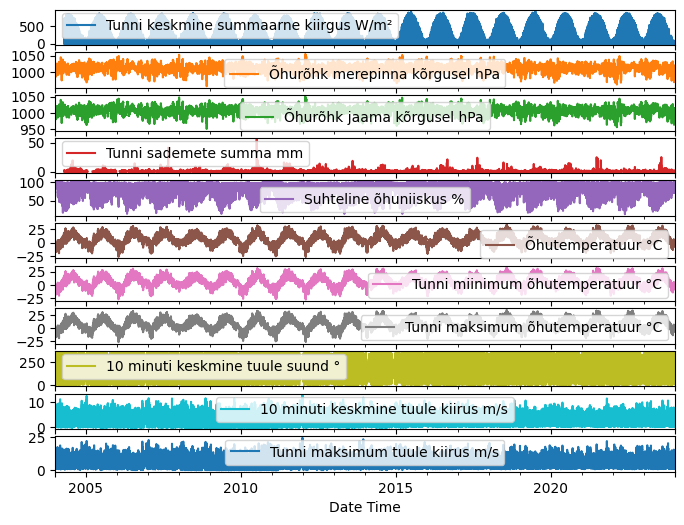

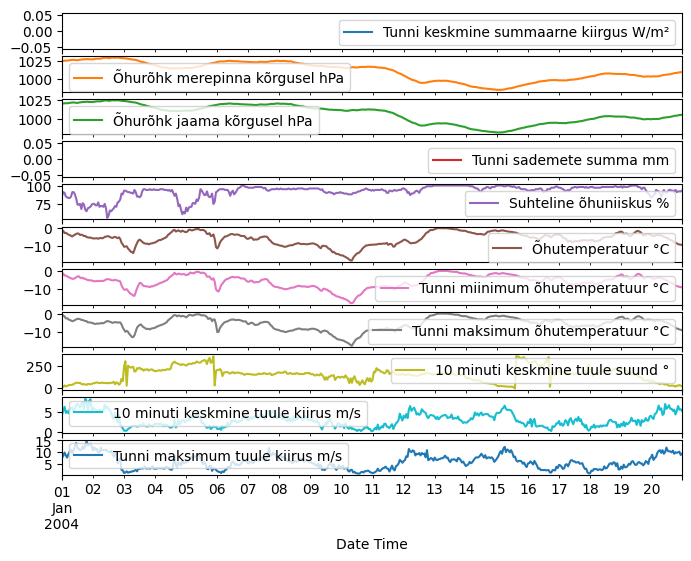

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

csv_path = 'Tallinn-Harku-2004-2023.csv'
df = pd.read_csv(csv_path)
print(df.columns)

df['Kell (UTC)'] = df['Kell (UTC)'].str.replace('.', ':')

# Combine 'Aasta', 'Kuu', 'Päev' and 'Kell (UTC)' into a datetime
df['Date Time'] = pd.to_datetime(df['Aasta'].astype(str) + df['Kuu'].astype(str).str.zfill(2) + df['Päev'].astype(str).str.zfill(2) + df['Kell (UTC)'], format='%Y%m%d%H:%M')
date_time = df['Date Time']
# Remove the 'Date Time' column
df = df.drop(['Aasta', 'Kuu', 'Päev', 'Date Time'], axis=1)

df.describe().transpose()

plot_cols = ['Tunni keskmine summaarne kiirgus W/m²', 'Õhurõhk merepinna kõrgusel hPa', 'Õhurõhk jaama kõrgusel hPa', 'Tunni sademete summa mm', 'Suhteline õhuniiskus %', 'Õhutemperatuur °C', 'Tunni miinimum õhutemperatuur °C', 'Tunni maksimum õhutemperatuur °C', '10 minuti keskmine tuule suund °', '10 minuti keskmine tuule kiirus m/s', 'Tunni maksimum tuule kiirus m/s']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

